# **Table of Contents:**


1.   Objective and Introduction
2.   Libraries
3.   First Look
4.   Explorations
5.   Observations
6.   EDA Flavors and Effects
7.   Preprocessing
8.   Modeling
9.   Evaluation


***1. Introduction***

This explorations wants to discover the effects and flavors related to cannabis types. I will use the Rating columns as a guide to exploration.

Introduction
Cannabis, also known as marijuana among other names,[n 1] is a psychoactive drug from the Cannabis plant intended for medical or recreational use. The main psychoactive part of cannabis is tetrahydrocannabinol (THC); one of 483 known compounds in the plant, including at least 65 other cannabinoids. Cannabis can be used by smoking, vaporizing, within food, or as an extract.

Cannabis is often used for its mental and physical effects, such as a "high" or "stoned" feeling, a general change in perception, euphoria (heightened mood), and an increase in appetite.Onset of effects is within minutes when smoked, and about 30 to 60 minutes when cooked and eaten.They last for between two and six hours. Short-term side effects may include a decrease in short-term memory, dry mouth, impaired motor skills, red eyes, and feelings of paranoia or anxiety. Long-term side effects may include addiction, decreased mental ability in those who started as teenagers, and behavioral problems in children whose mothers used cannabis during pregnancy. Studies have found a strong relation between cannabis use and the risk of psychosis,though the cause-and-effect relationship is debated.

Proposed question that may help us understand the dataset:


*   Are the species distribution of our dataset equal?
*   Do all types of strains have the same distribution?
*   What is the first word in the description to each species?
*   Is te Flavor important to the rating?
*   Are the Effects important to the rating?
*   Are some differences in Effects and Flavors related by species?







In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [84]:
!pip install sklearn tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=844a4d69e67fc56707ff9502c18c69f00816695c43a3f8ab6dc847c7dd0b00be
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


***2. Libraries and Imports***

In [3]:
import pandas as pd # to dataframes
import matplotlib.pyplot as plt # to define plot parameters
import seaborn as sns # to graph plots
import numpy as np # for math
plt.style.use('ggplot') # to plot graphs with ggplot2 style

# NLP and Wordcloud
from wordcloud import WordCloud, STOPWORDS
import nltk.tokenize as word_tokenize
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction import _stop_words

In [4]:
strains = pd.read_csv('cannabis.csv')

***3. Knowing the Data:***


In [5]:
# Verifying shape
print(strains.shape)
print(strains.isnull().sum())
print(strains.info())
strains.head(6)

(2351, 6)
Strain          0
Type            0
Rating          0
Effects         0
Flavor         46
Description    33
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       2351 non-null   object 
 1   Type         2351 non-null   object 
 2   Rating       2351 non-null   float64
 3   Effects      2351 non-null   object 
 4   Flavor       2305 non-null   object 
 5   Description  2318 non-null   object 
dtypes: float64(1), object(5)
memory usage: 110.3+ KB
None


Strain    Type  Rating                                     Effects  \
0          100-Og  hybrid     4.0  Creative,Energetic,Tingly,Euphoric,Relaxed   
1  98-White-Widow  hybrid     4.7    Relaxed,Aroused,Creative,Happy,Energetic   
2            1024  sativa     4.4   Uplifted,Happy,Relaxed,Energetic,Creative   
3        13-Dawgs  hybrid     4.2     Tingly,Creative,Hungry,Relaxed,Uplifted   
4        24K-Gold  hybrid     4.6   Happy,Relaxed,Euphoric,Uplifted,Talkative   
5      3-Bears-Og  indica     0.0                                        None   

                      Flavor  \
0        Earthy,Sweet,Citrus   
1      Flowery,Violet,Diesel   
2    Spicy/Herbal,Sage,Woody   
3  Apricot,Citrus,Grapefruit   
4       Citrus,Earthy,Orange   
5                       None   

                                         Description  
0  $100 OG is a 50/50 hybrid strain that packs a ...  
1  The ‘98 Aloha White Widow is an especially pot...  
2  1024 is a sativa-dominant hybrid bred in Spain...  
3  13 Dawgs is a hybrid of G13 and Chemdawg genet...  
4  Also known as Kosher Tangie, 24k Gold is a 60%...  
5  3 Bears OG by Mephisto Genetics is an autoflow...

In [6]:
strains['Type'] = strains.Type.astype(str)
# Structure of data
print(strains.nunique())

Strain         2350
Type              3
Rating           26
Effects        1655
Flavor         1293
Description    2312
dtype: int64


***4. Data Exploration:***

We have 3 principal types of cannabis:


*   [Indicas](https://www.claybourneco.com/blog/indica-strain-guide)
*   [Sativas](https://plants.ces.ncsu.edu/plants/cannabis-sativa/)
*   [Hybrids](https://leafwell.com/blog/what-is-hybrid-cannabis/)






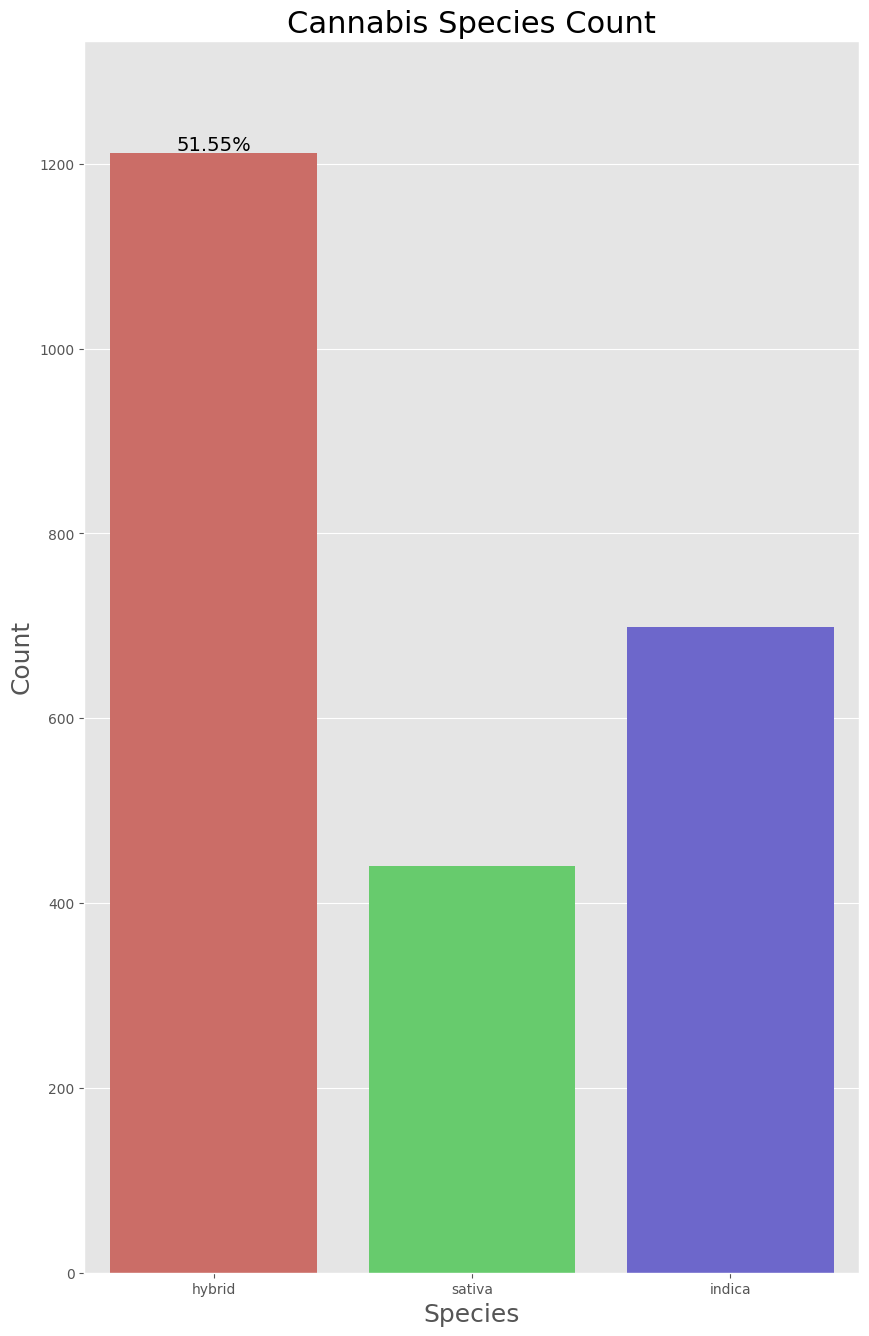

In [7]:
# Distribution Types
total = len(strains)
plt.figure(figsize=(10,16))

g = sns.countplot(x="Type", data=strains,
                  palette='hls', color='blue')
g.set_title("Cannabis Species Count", fontsize=22)
g.set_xlabel("Species", fontsize=18)
g.set_ylabel("Count", fontsize=18)
sizes=[]
for p in g.patches:
  height= p.get_height()
  sizes.append(height)
  g.text(p.get_x() + p.get_width() / 2,
         height + 3,
         '{:1.2f}%'.format(height/total*100),
         ha= "center", fontsize=14)
  g.set_ylim(0, max(sizes) * 1.10)

  plt.show()

We can se that a greater percentage of cannabis species are of the Hybrid type while the lesser are of the Sativa type.

***Distribution of Rating and type by Rating***

<ipython-input-8-c0435bb8a742>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(strains['Rating'],


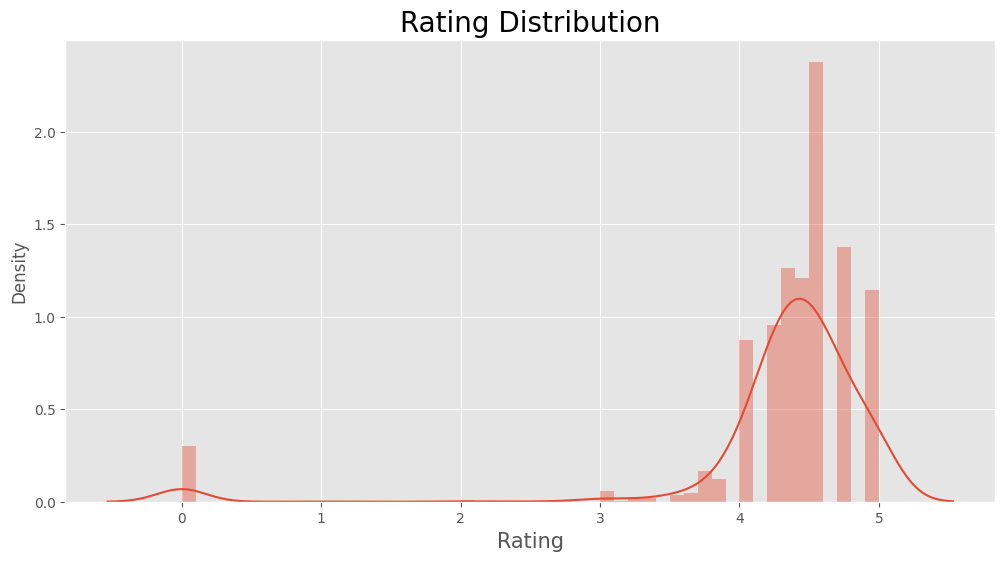

In [8]:
plt.figure(figsize=(12,6))

# Total rating distribution
g = sns.distplot(strains['Rating'],
                 bins=50)
g.set_title("Rating Distribution",
            size=20)
g.set_xlabel("Rating",
             fontsize=15)

plt.show()

Almost all species have a higher rating than 4.

***Descriptive Rating by Cannabis Species***

Distributions seperated by species


In [9]:
print("Rating Distribution by Species Type")
pd.crosstab(strains[strains.Rating > 3.0]['Rating'],
             strains.Type.T)

Rating Distribution by Species Type


Type    hybrid  indica  sativa
Rating                        
3.1          1       0       0
3.2          1       2       0
3.3          2       0       1
3.4          2       1       2
3.5          5       2       2
3.6          6       4       1
3.7          7       5       4
3.8          9      10       4
3.9          9      12       8
4.0         62      24      18
4.1         56      33      12
4.2        113      64      48
4.3        150      89      58
4.4        144      83      57
4.5        164      94      59
4.6        114      78      50
4.7         95      47      22
4.8         88      41      30
4.9         31      19       9
5.0        102      70      38

More than 50% of strains are hybrid strains. Hybrids are dominating almost all rating values.

***Visualizing Rating Distribution by Different Species***

<ipython-input-10-099b1fe51192>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(strains[(strains.Type == 'hybrid') &
<ipython-input-10-099b1fe51192>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.distplot(strains[(strains.Type == "sativa") &
<ipython-input-10-099b1fe51192>:25: UserWarning: 


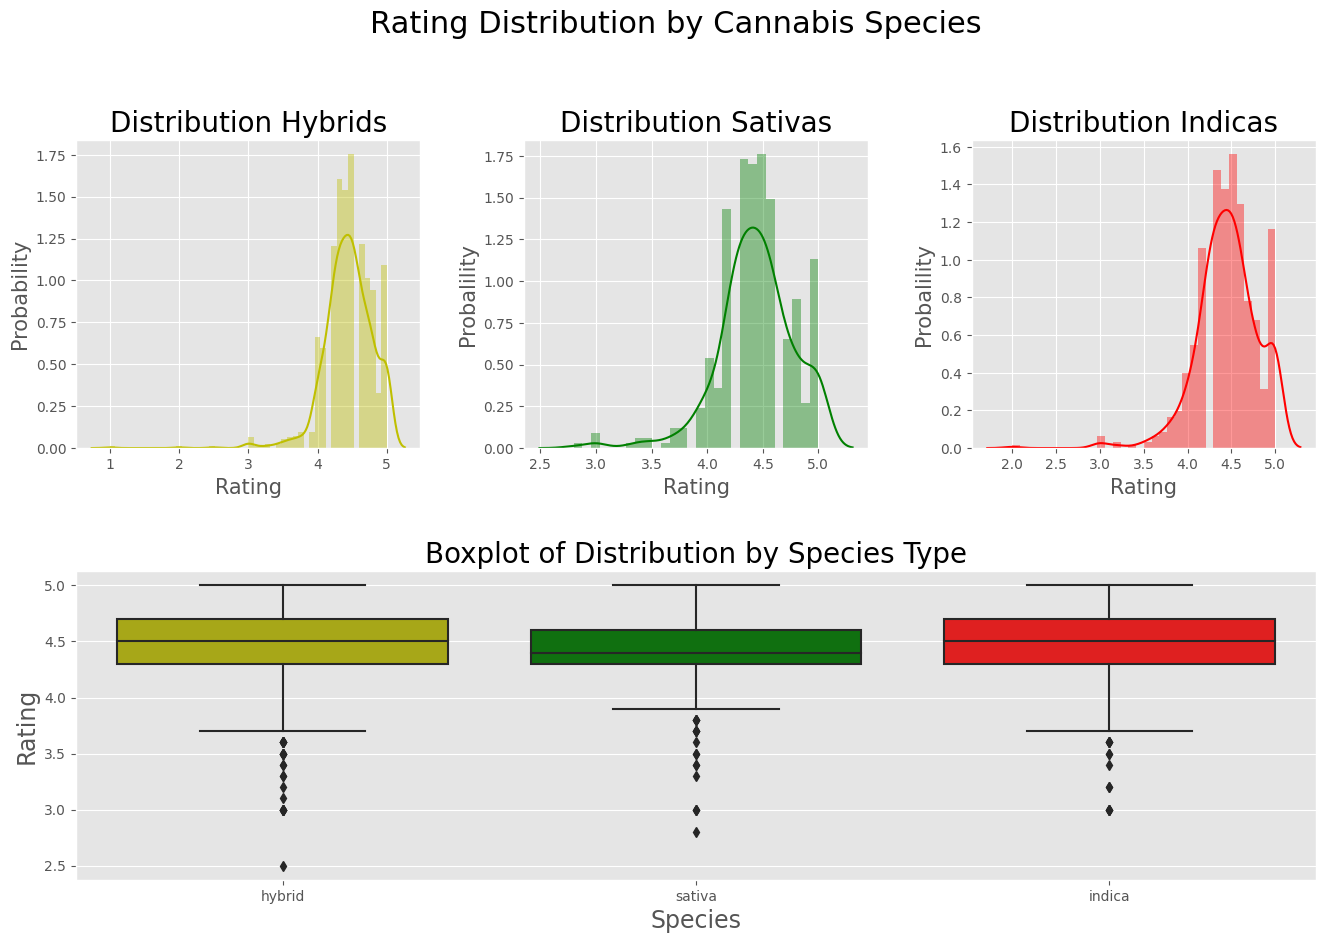

In [10]:
plt.figure(figsize=(16,10))

plt.suptitle("Rating Distribution by Cannabis Species",
             fontsize=22)

# Rating by Distribution Type
g = plt.subplot(231)
g = sns.distplot(strains[(strains.Type == 'hybrid') &
                         (strains.Rating > 0)]["Rating"],
                 color = 'y')
g.set_xlabel("Rating", fontsize=15)
g.set_ylabel("Probability", fontsize=15)
g.set_title("Distribution Hybrids", fontsize=20)

g1 = plt.subplot(232)
g1 = sns.distplot(strains[(strains.Type == "sativa") &
                          (strains.Rating > 0)]["Rating"],
                  color='g')

g1.set_xlabel("Rating", fontsize=15)
g1.set_ylabel("Probalility", fontsize=15)
g1.set_title("Distribution Sativas", fontsize=20)

g2 = plt.subplot(233)
g2 = sns.distplot(strains[(strains.Type == "indica") &
                          (strains.Rating > 0)]["Rating"],
                  color='r')

g2.set_xlabel("Rating", fontsize=15)
g2.set_ylabel("Probalility", fontsize=15)
g2.set_title("Distribution Indicas", fontsize=20)

g3 = plt.subplot(212)

my_pal = {"hybrid":"y", "sativa":"g", "indica":"r"}

# Explore the Rating Distribution by Type
g3 = sns.boxplot(x="Type", y="Rating", palette=my_pal,
                 data=strains[strains["Rating"] > 2])
g3.set_title("Boxplot of Distribution by Species Type",
             fontsize=20)
g3.set_xlabel("Species", fontsize=17)
g3.set_ylabel("Rating", fontsize=17)

plt.subplots_adjust(wspace=0.3, hspace=0.4, top=0.85)

plt.show()

Sativa and Indica have similar rating distribution.

Almost all speacies in dataset have a rating of 4.

The Sativa rating is slightly smaller than Hybrids and Indicas.

***Effects of Strains***

In [11]:
# Extract values in Effects and Flavors and pass to a new algorithm
df_effect = pd.DataFrame(strains.Effects.str.split(',',4).tolist(),
                         columns=['Effect_1','Effect_2','Effect_3',
                                  'Effect_4','Effect_5'])
df_flavors = pd.DataFrame(strains.Effects.str.split(',',2, expand=True).values.tolist(),
                          columns = ['Flavor_1','Flavor_2','Flavor_3'])

<ipython-input-11-f8b725bcb0cd>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_effect = pd.DataFrame(strains.Effects.str.split(',',4).tolist(),
<ipython-input-11-f8b725bcb0cd>:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_flavors = pd.DataFrame(strains.Effects.str.split(',',2, expand=True).values.tolist(),


In [12]:
# Concatenating new variables with strains
strains = pd.concat([strains, df_effect], axis=1)
strains = pd.concat([strains, df_flavors], axis=1)

# Looking at results
strains.head()

strains.columns

Index(['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description',
       'Effect_1', 'Effect_2', 'Effect_3', 'Effect_4', 'Effect_5', 'Flavor_1',
       'Flavor_2', 'Flavor_3'],
      dtype='object')

Effects and Flavors are now in seperate columns.

***Most Related Effects and respective Rating***

The top 5 First Related Effects
Relaxed     825
Happy       476
Euphoric    249
Uplifted    244
Sleepy       89
Name: Effect_1, dtype: int64


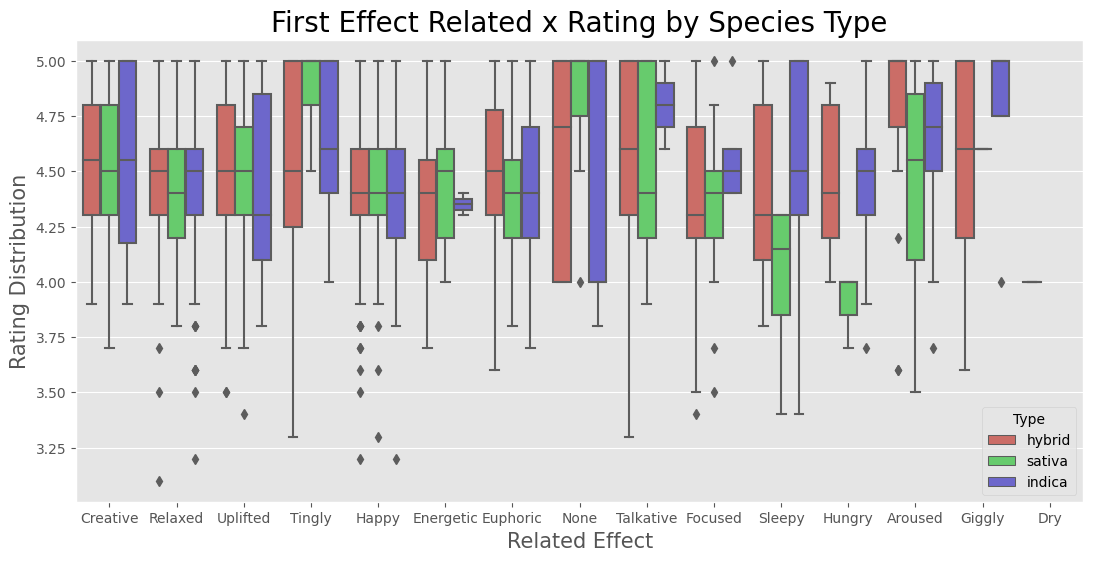

In [13]:
print("The top 5 First Related Effects")
print(strains['Effect_1'].value_counts()[:5])

plt.figure(figsize=(13,6))

g = sns.boxplot(x = 'Effect_1', y = 'Rating',
                hue='Type',
                data=strains[strains['Rating'] > 3],
                palette='hls')
g.set_xlabel("Related Effect", fontsize=15)
g.set_ylabel("Rating Distribution", fontsize=15)
g.set_title("First Effect Related x Rating by Species Type", fontsize=20)

plt.show()

For example, we can note that Indica's with talkative effects, has highest mean than other species.

***The second Most Related Effects and respective Rating***

The top 5 Second Related Effects
Happy       571
Relaxed     351
Euphoric    342
Uplifted    321
Sleepy      197
Name: Effect_2, dtype: int64


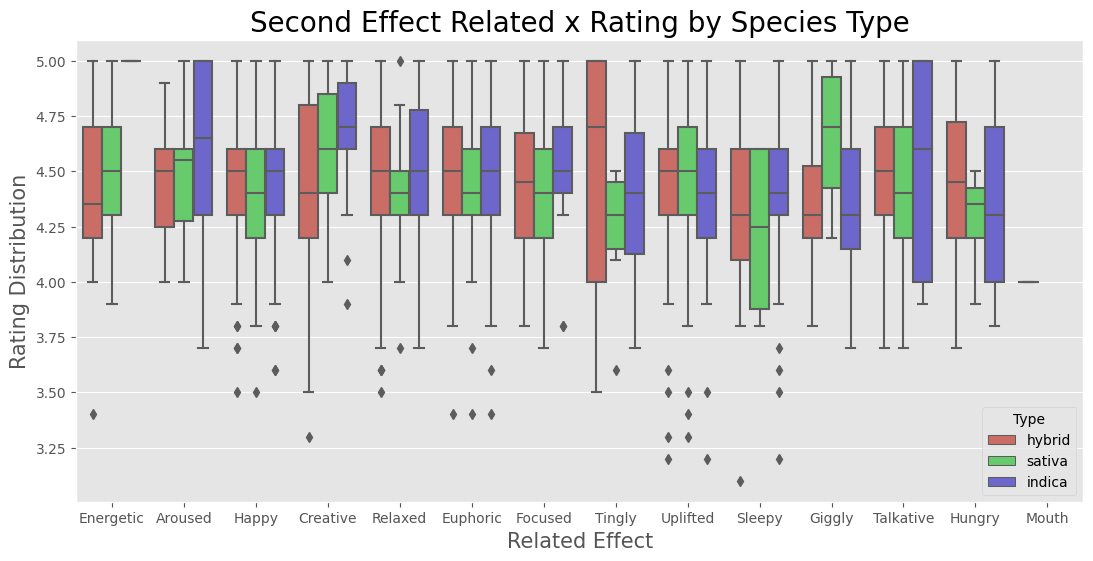

In [14]:
print("The top 5 Second Related Effects")
print(strains['Effect_2'].value_counts()[:5])

plt.figure(figsize=(13,6))

g = sns.boxplot(x = 'Effect_2', y = 'Rating',
                hue='Type',
                data=strains[strains['Rating'] > 3],
                palette='hls')
g.set_xlabel("Related Effect", fontsize=15)
g.set_ylabel("Rating Distribution", fontsize=15)
g.set_title("Second Effect Related x Rating by Species Type", fontsize=20)

plt.show()

***First Flavor related***

*   We have 33 flavors in total




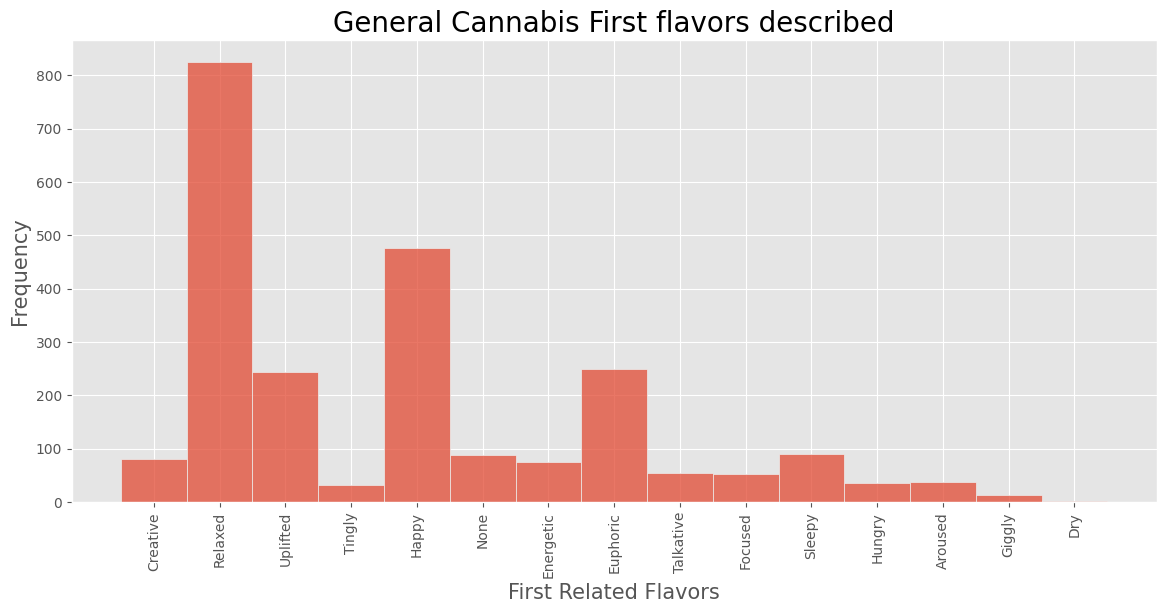

In [15]:
plt.figure(figsize=(14,6))
sns.histplot(x=strains["Flavor_1"])
plt.xticks(rotation=90)
plt.xlabel('First Related Flavors', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('General Cannabis First flavors described', fontsize=20)

plt.show()

***Explore the Strains with Rating of 5***

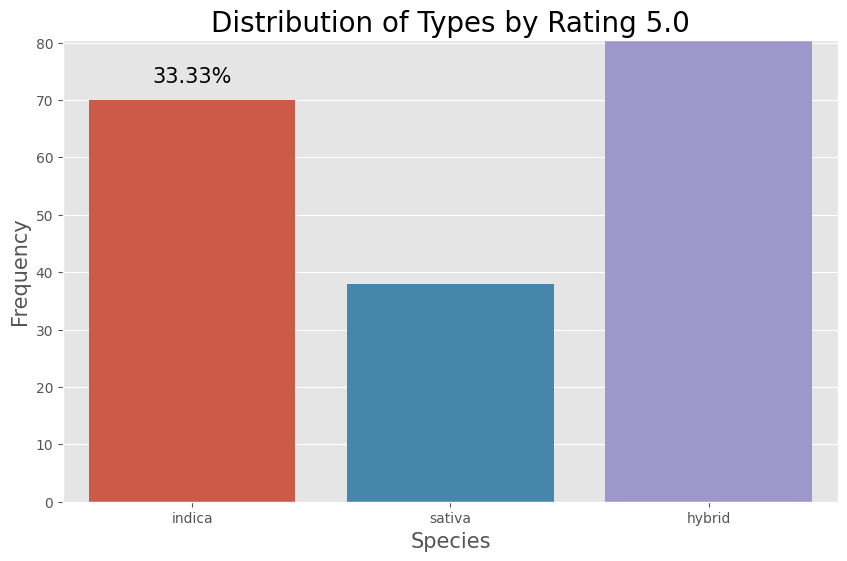

In [16]:
# Type with most strains with a rating of 5
total_rat5 = len(strains[strains['Rating'] == 5])

plt.figure(figsize=(10,6))
g = sns.countplot(x="Type", data=strains[strains['Rating'] == 5])
g.set_xlabel('Species', fontsize=15)
g.set_ylabel('Frequency', fontsize=15)
g.set_title('Distribution of Types by Rating 5.0', fontsize=20)

sizes = []
for p in g.patches:
  height = p.get_height()
  sizes.append(height)
  g.text(p.get_x()+p.get_width()/2,
         height + 3,
         '{:1.2f}%'.format(height/total_rat5 * 100),
         ha="center", fontsize=15)
  g.set_ylim(0,max(sizes)*1.15)

  plt.show()

Altought we have similar percentage for each category, maybe we can infer that indica's has a better quality in general.

***Exploring the principal Effects and Flavors related in Rating five strains***

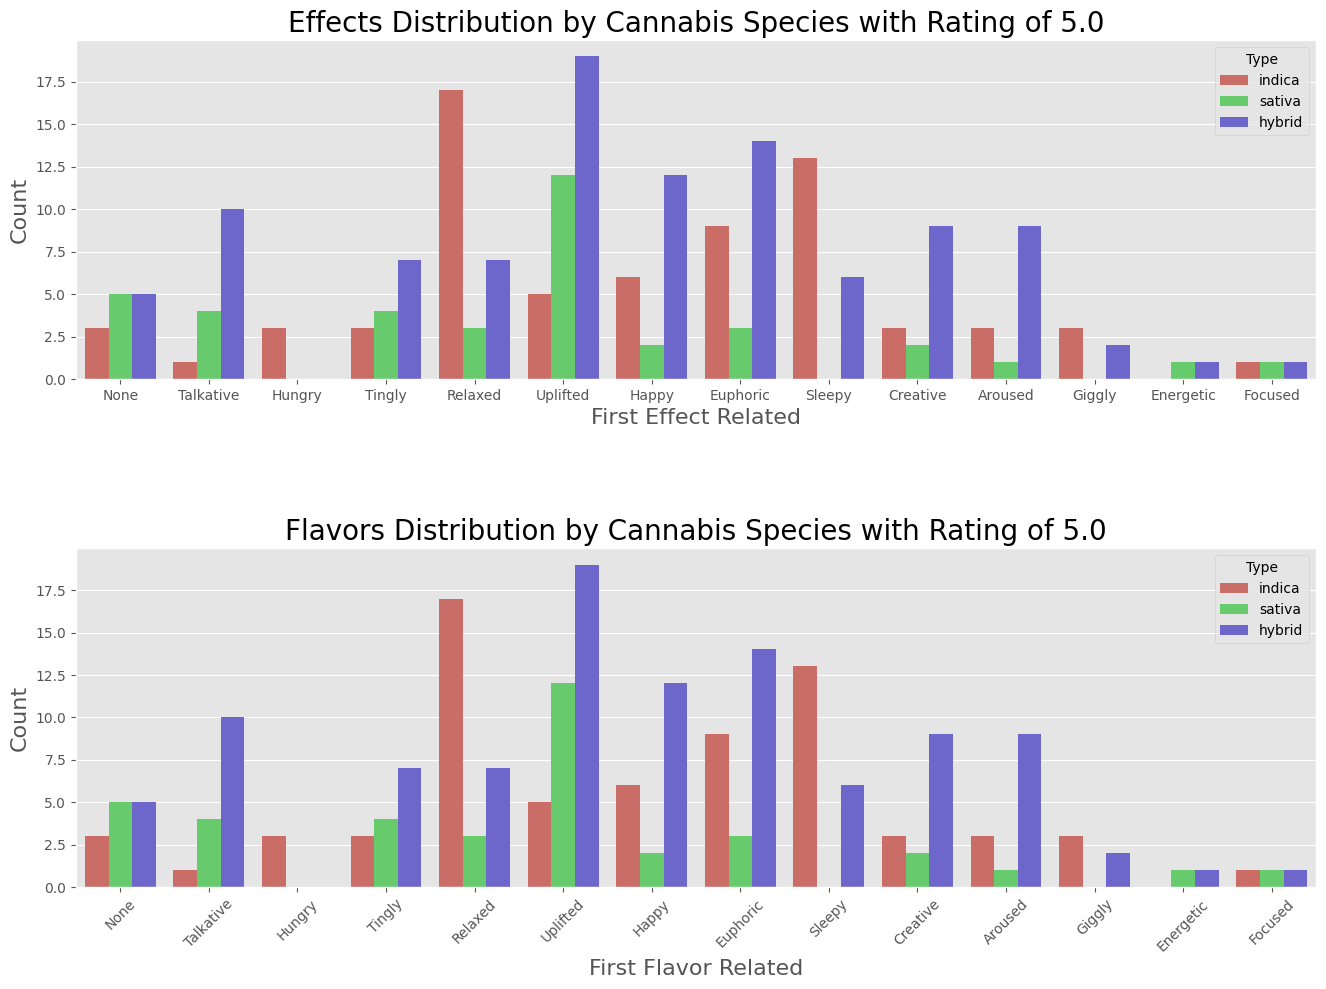

In [17]:
top_strains = strains[strains['Rating'] == 5]

plt.figure(figsize=(16, 11))

plt.subplot(211)
g = sns.countplot(x='Effect_1', data= top_strains,
                  hue='Type', palette='hls')
g.set_title('Effects Distribution by Cannabis Species with Rating of 5.0',
            fontsize=20)
g.set_xlabel('First Effect Related',
             fontsize=16)
g.set_ylabel('Count',
             fontsize=16)

plt.subplot(212)
g1 = sns.countplot(x='Flavor_1', data= top_strains,
                  hue='Type', palette='hls')
g1.set_title('Flavors Distribution by Cannabis Species with Rating of 5.0',
            fontsize=20)
g1.set_xlabel('First Flavor Related',
             fontsize=16)
g1.set_ylabel('Count',
             fontsize=16)
g1.set_xticklabels(g1.get_xticklabels(), rotation=45)

plt.subplots_adjust(hspace=0.5)

plt.show()

The most related flavors are Sweet and Earthly.
Skunk#1 was highly Earthly and Pungent.

The distribution of data:


*   Hybrid - 51.55%
*   Indica - 29.73%
*   Sativa - 18.72%




In [18]:
# Create a subset by each type and explore thier Flavors and Effects
hybrids = strains[strains.Type == 'hybrid']
indicas = strains[strains.Type == "indica"]
sativas = strains [strains.Type == 'sativa']

In [19]:
# Delete columns that will not be useful
del strains['Effects']
del strains['Flavor']

In [20]:
# Create the splinter
def get_effects(dataframe):
  ret_dict = {}
  for list_ef in dataframe.Effects:
    effects_list = list_ef.split(',')
    for effect in effects_list:
      if not effect in ret_dict:
        ret_dict[effect] = 1
      else:
        ret_dict[effect] += 1
  return ret_dict

***5. Sativa effects***

In [21]:
# Running flavor counts to sativas
sativa_effects = get_effects(sativas)
sativa_effects = pd.DataFrame.from_dict(
    sativa_effects,
    orient='index').reset_index().rename(
        columns={'index': 'effects', 0:'count'})

# Getting indica effects
indicas_effects = get_effects(indicas)
indicas_effects = pd.DataFrame.from_dict(
    indicas_effects,
    orient='index').reset_index().rename(
        columns={'index':'effects', 0:'count'})

# Getting hybrids flavors
hybrids_effects = get_effects(hybrids)
hybrids_effects = pd.DataFrame.from_dict(
    hybrids_effects,
    orient='index').reset_index().rename(
        columns={'index':'effects', 0:'count'})

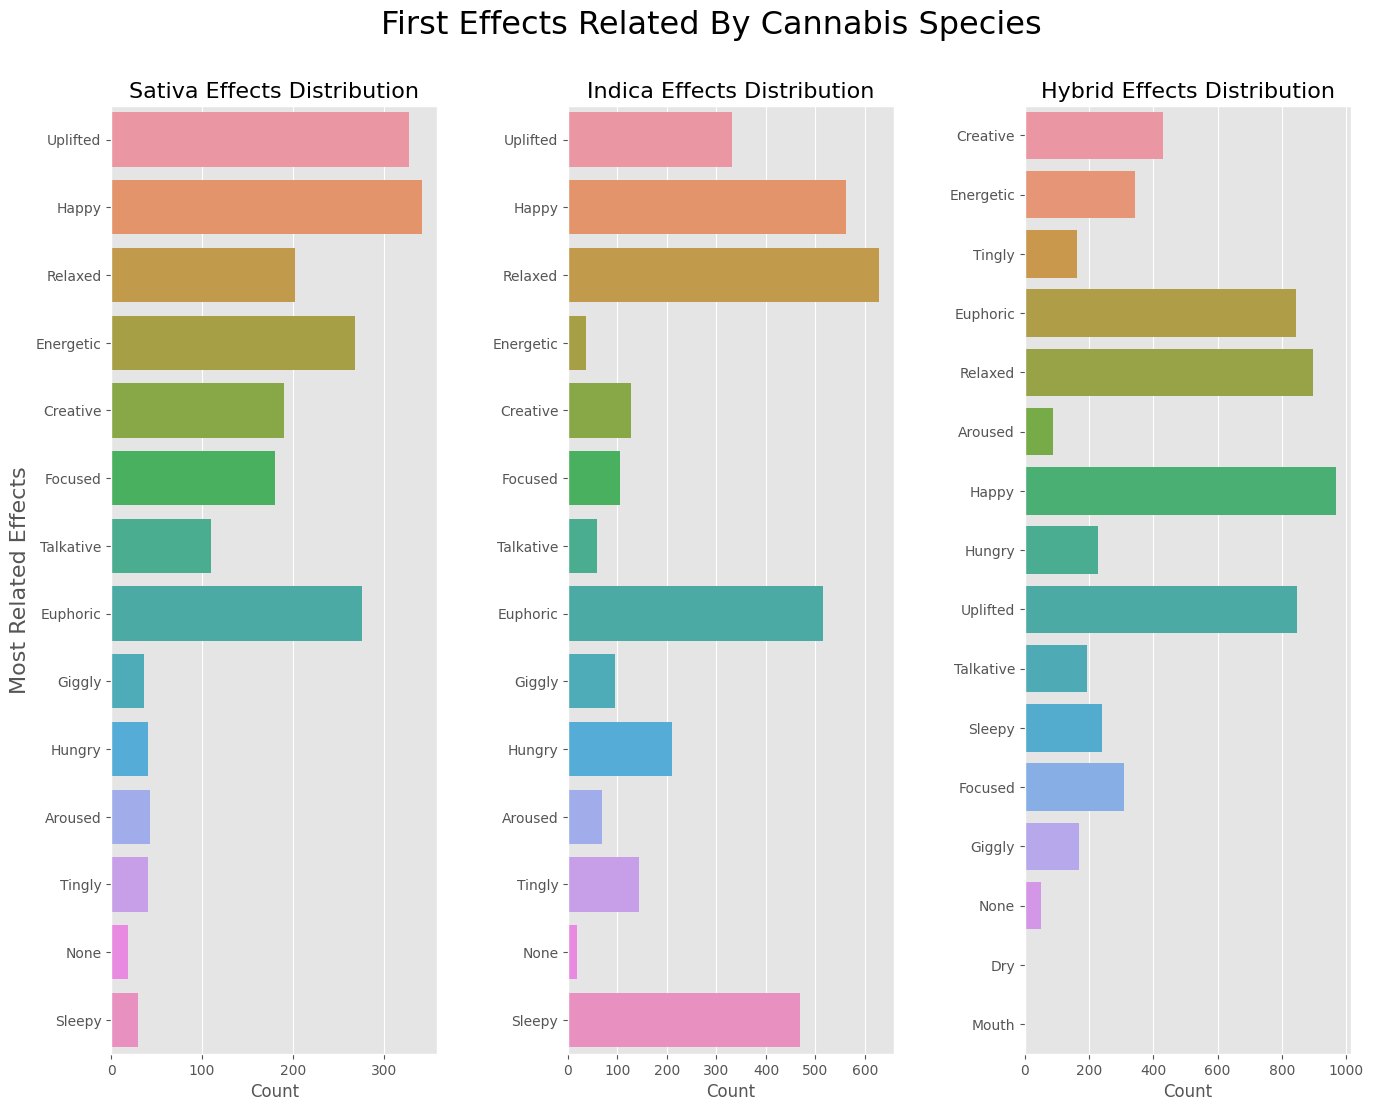

In [22]:
plt.figure(figsize=(16,12))
plt.suptitle('First Effects Related By Cannabis Species',
             fontsize=23)
plt.subplot(131)
g = sns.barplot(y='effects', x='count',
                order=sativa_effects.effects.values,
                data=sativa_effects, orient='h')
g.set_xlabel('Count',
             fontsize=12)
g.set_ylabel('Most Related Effects',
             fontsize=16)
g.set_title('Sativa Effects Distribution',
            fontsize=16)

plt.subplot(132)
g1 = sns.barplot(y='effects', x='count',
                 order=sativa_effects.effects.values,
                data=indicas_effects, orient='h')
g1.set_xlabel('Count',
             fontsize=12)
g1.set_ylabel('',
             fontsize=16)
g1.set_title('Indica Effects Distribution',
            fontsize=16)

plt.subplot(133)
g2 = sns.barplot(y='effects', x='count',
                order=hybrids_effects.effects.values,
                data=hybrids_effects, orient='h')
g2.set_xlabel('Count',
             fontsize=12)
g2.set_ylabel('',
             fontsize=16)
g2.set_title('Hybrid Effects Distribution',
            fontsize=16)

plt.subplots_adjust(wspace=0.4, top=0.90)

plt.show()

We can see that Happy, Uplifting, Ralaxed, and Euphoric have a high ranking at all 3 types.

Almost 350 of 440 in sativas related Happy and Uplifting Effects.
*   'Happy': 342
*   'Uplifted': 328
*   'Euphoric': 276
*   'Energetic': 268

78% described Happy to Sativa strains

Indicas have 699 votes. Relaxed being the most frequent with a distribution of:

*   'Relaxed':628
*   'Happy':562
*   'Euphoric':516
*   'Sleepy':468

90% described Relaxed to indicas

Hybrids have 1212 votes and the distribution of effects is:
*   'Hapy':967
*   'Relaxed':896
*   'Uplifting':848
*   'Euphoric':843

80% has subscribed to Happy and 76% related Relaxed to Hybrid strains.






***6. Exploring general Flavors and Effects:***

Checking the Flavors:

In [23]:
# Creating flavors, cutting each flavor by row
def flavors(dataframe):
  ret_dict = {}
  for list_ef in dataframe.Flavor.dropna():
    flavors_list = list_ef.split(',')
    for flavor in flavors_list:
      if not flavor in ret_dict:
        ret_dict[flavor] = 1
      else:
        ret_dict[flavor] += 1
  return ret_dict


In [24]:
# Running flavor counts to sativas
sativa_flavors = flavors(sativas)
sativa_flavors = pd.DataFrame.from_dict(
    sativa_flavors,
    orient='index').reset_index().rename(
        columns={'index': 'flavors', 0:'count'})

# Getting indica flavors
indicas_flavors = flavors(indicas)
indicas_flavors = pd.DataFrame.from_dict(
    indicas_flavors,
    orient='index').reset_index().rename(
        columns={'index':'flavors', 0:'count'})

# Getting hybrids flavors
hybrids_flavors = flavors(hybrids)
hybrids_flavors = pd.DataFrame.from_dict(
    hybrids_flavors,
    orient='index').reset_index().rename(
        columns={'index':'flavors', 0:'count'})

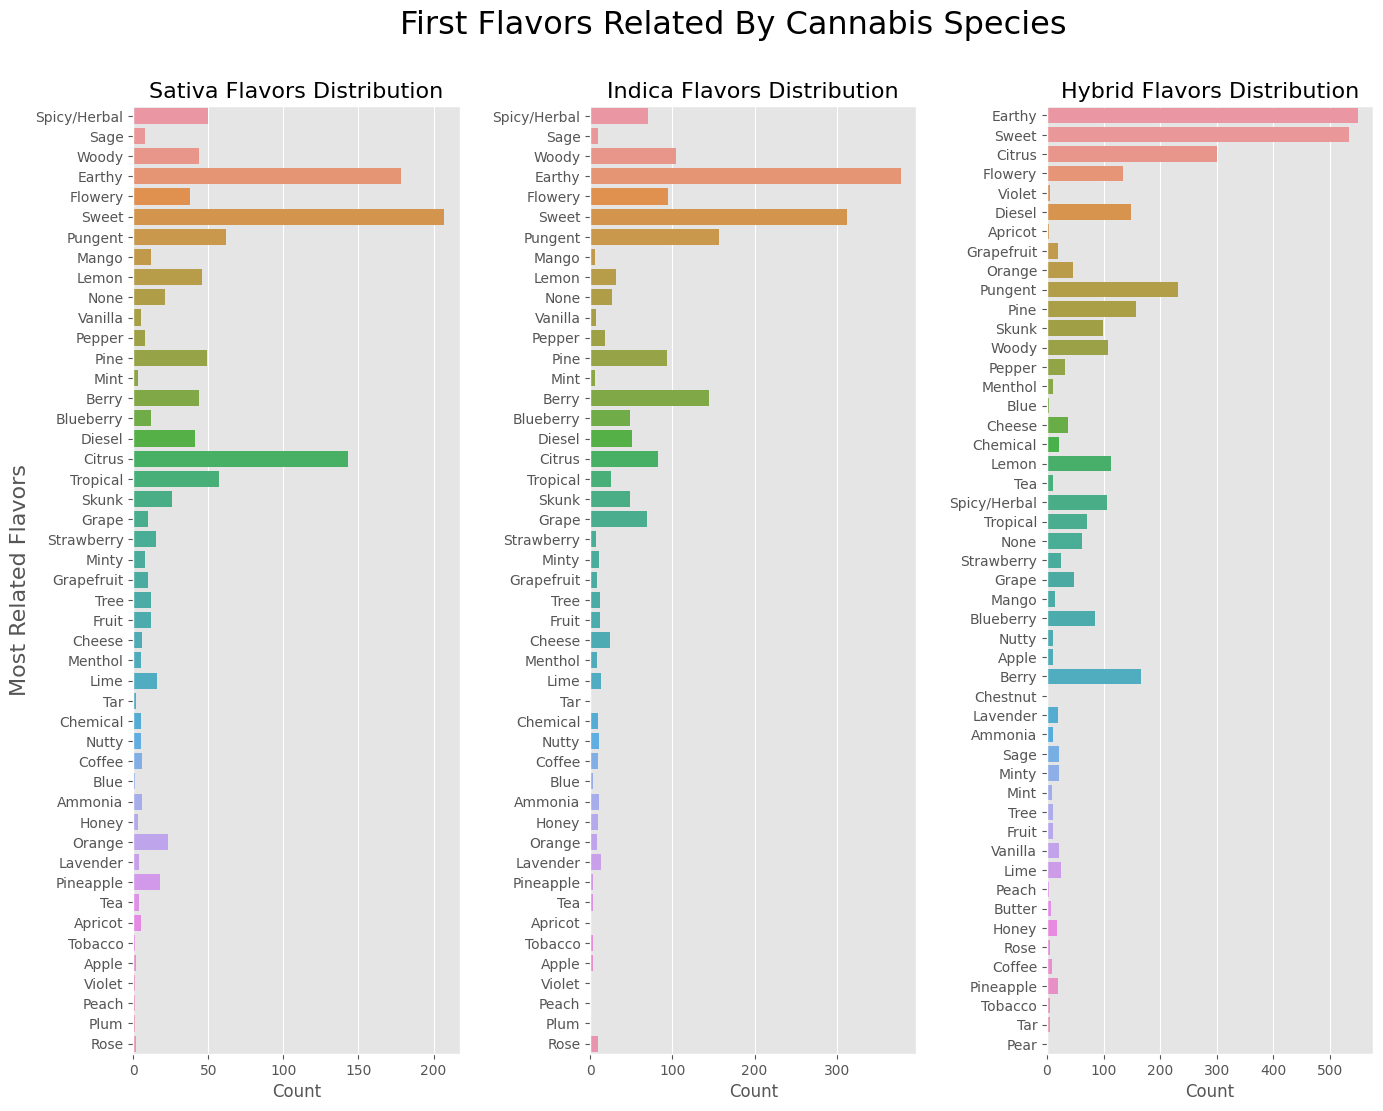

In [25]:
plt.figure(figsize=(16,12))
plt.suptitle('First Flavors Related By Cannabis Species',
             fontsize=23)

plt.subplot(131)
g = sns.barplot(y='flavors', x='count',
                order=sativa_flavors.flavors.values,
                data=sativa_flavors, orient='h')
g.set_xlabel('Count',
             fontsize=12)
g.set_ylabel('Most Related Flavors',
             fontsize=16)
g.set_title('Sativa Flavors Distribution',
            fontsize=16)

plt.subplot(132)
g1 = sns.barplot(y='flavors', x='count',
                 order=sativa_flavors.flavors.values,
                data=indicas_flavors, orient='h')
g1.set_xlabel('Count',
             fontsize=12)
g1.set_ylabel('',
             fontsize=16)
g1.set_title('Indica Flavors Distribution',
            fontsize=16)

plt.subplot(133)
g2 = sns.barplot(y='flavors', x='count',
                order=hybrids_flavors.flavors.values,
                data=hybrids_flavors, orient='h')
g2.set_xlabel('Count',
             fontsize=12)
g2.set_ylabel('',
             fontsize=16)
g2.set_title('Hybrid Flavors Distribution',
            fontsize=16)

plt.subplots_adjust(wspace=0.4, top=0.90)

plt.show()

Most frequent flavors in Sativas:
Sweet: 207
Earthy: 178
Citrus: 143

Most frequent values in indicas
Earthy: 378
Sweet: 312
Pungent: 157
Berry: 145

The most frequent values in Hybrid type is:
Earthy: 549
Sweet: 534
Citrus: 301

***Descriptive Features***

In [26]:
# Total words in review
strains['count_word'] = strains['Description'].apply(
    lambda x: len(str(x).split()))

# Total letters in review
strains['count_letters'] = strains['Description'].apply(
    lambda x: len(str(x)))

# Mean Length of words
strains['mean_word_len'] = strains['Description'].apply(
    lambda x: np.mean([len(w) for w in str(x).split()]))

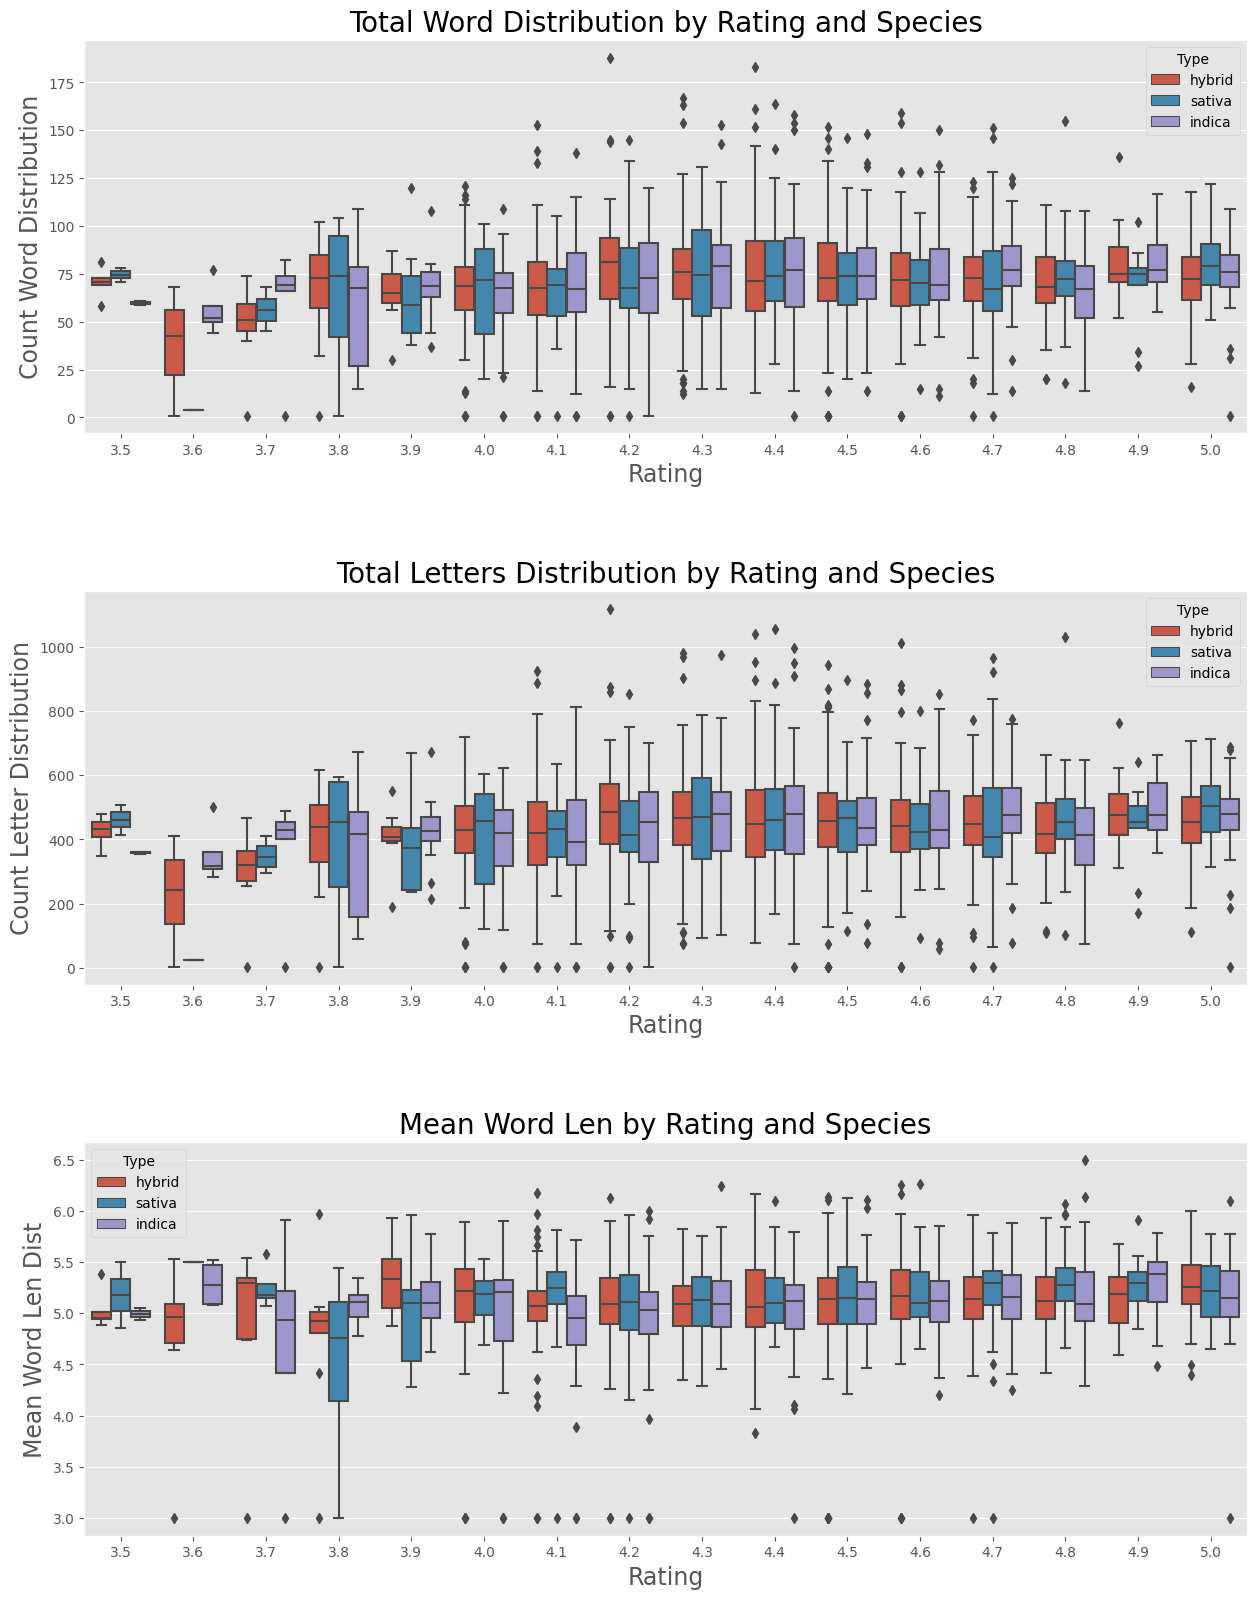

In [27]:
plt.figure(figsize=(15,17))

g = plt.subplot(311)
g = sns.boxplot(x='Rating', y='count_word',
                hue='Type', data=strains[strains['Rating'] >= 3.5])
g.set_xlabel("Rating", fontsize=17)
g.set_ylabel("Count Word Distribution", fontsize=17)
g.set_title("Total Word Distribution by Rating and Species",
             fontsize=20)

g1 = plt.subplot(312)
g1 = sns.boxplot(x='Rating', y='count_letters',
                 hue='Type', data=strains[strains['Rating'] >= 3.5])
g1.set_xlabel("Rating", fontsize=17)
g1.set_ylabel("Count Letter Distribution", fontsize=17)
g1.set_title("Total Letters Distribution by Rating and Species",
             fontsize=20)

g2 = plt.subplot(313)
g2 = sns.boxplot(x='Rating', y='mean_word_len',
                 hue='Type', data=strains[strains['Rating'] >= 3.5])
g2.set_xlabel("Rating", fontsize=17)
g2.set_ylabel("Mean Word Len Dist", fontsize=17)
g2.set_title("Mean Word Len by Rating and Species",
             fontsize=20)

plt.subplots_adjust(hspace = 0.4,top = 0.99)

plt.show()

***Description - WordClouds***

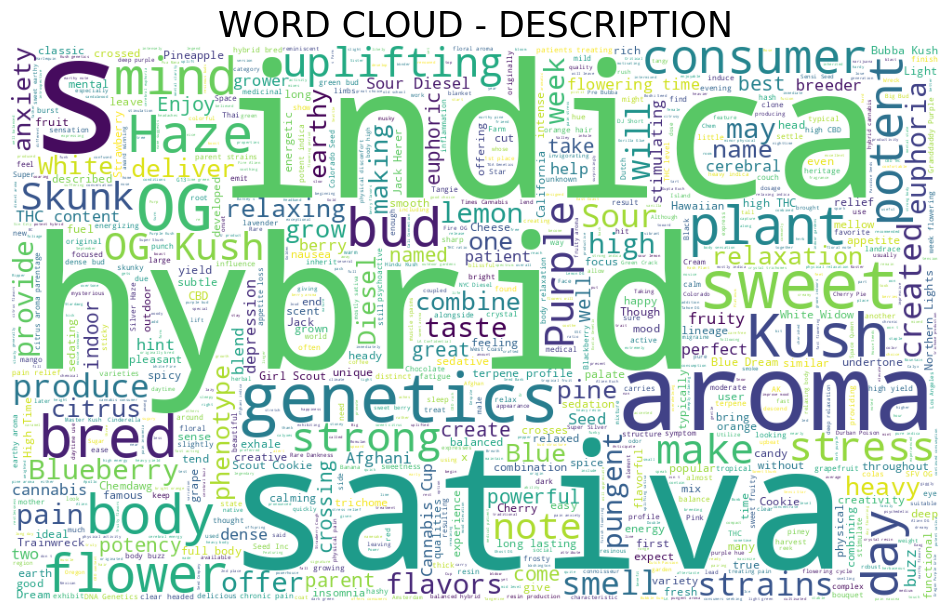

In [28]:
stopwords = set(STOPWORDS)
newStopWords = ['strain', 'effect', 'genetic', 'effects', 'flavor',
                'dominant', 'known','cross']
stopwords.update(newStopWords)

wordcloud = WordCloud(background_color='white',
                      stopwords = stopwords,
                      max_words=1500,
                      max_font_size=200,
                      width=1000, height=600,
                      random_state=42
                      ).generate(" ".join(strains['Description'].astype(str)))

fig = plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",
          fontsize=25)
plt.axis('off')
plt.show()

***Word Cloud Sativas***

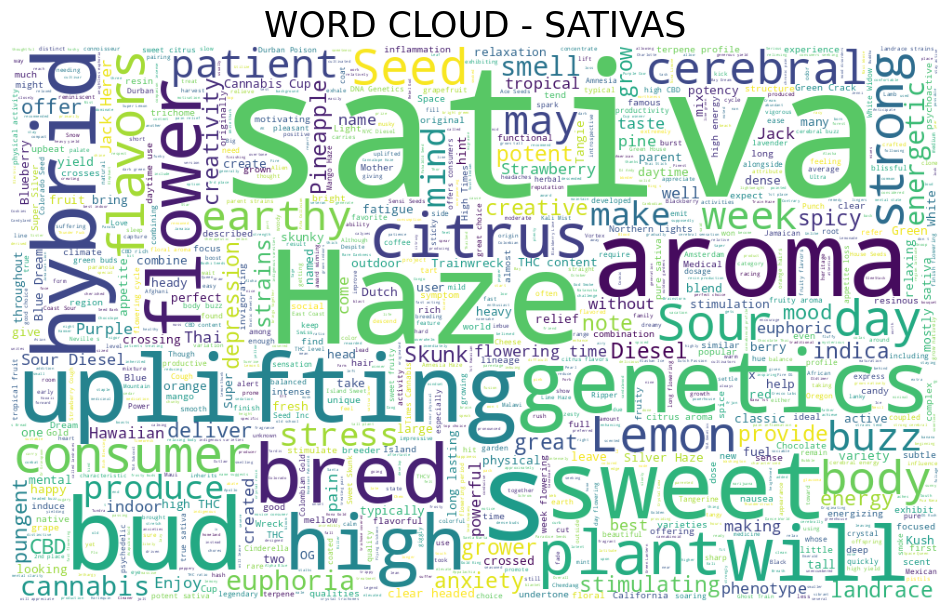

In [29]:
stopwords = set(STOPWORDS)
newStopWords = ['strain', 'effect', 'genetic', 'effects', 'flavor',
                'dominant', 'known','cross']
stopwords.update(newStopWords)

wordcloud = WordCloud(background_color='white',
                      stopwords = stopwords,
                      max_words=1500,
                      max_font_size=200,
                      width=1000, height=600,
                      random_state=42
                      ).generate(
                          " ".join(
                              strains[strains.Type == 'sativa']
                               ['Description'].astype(str)))

fig = plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - SATIVAS",
          fontsize=25)
plt.axis('off')
plt.show()

***Word Cloud Indicas***

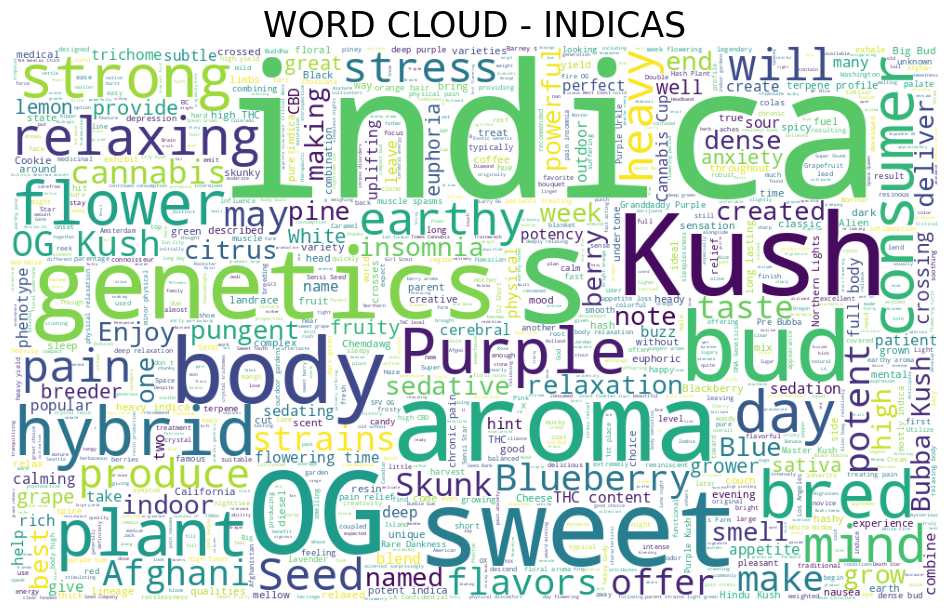

In [30]:
stopwords = set(STOPWORDS)
newStopWords = ['strain', 'effect', 'genetic', 'effects', 'flavor',
                'dominant', 'known','cross']
stopwords.update(newStopWords)

wordcloud = WordCloud(background_color='white',
                      stopwords = stopwords,
                      max_words=1500,
                      max_font_size=200,
                      width=1000, height=600,
                      random_state=42
                      ).generate(
                          " ".join(
                              strains[strains.Type == 'indica']
                               ['Description'].astype(str)))

fig = plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - INDICAS",
          fontsize=25)
plt.axis('off')
plt.show()

***Word Cloud Hybrids***

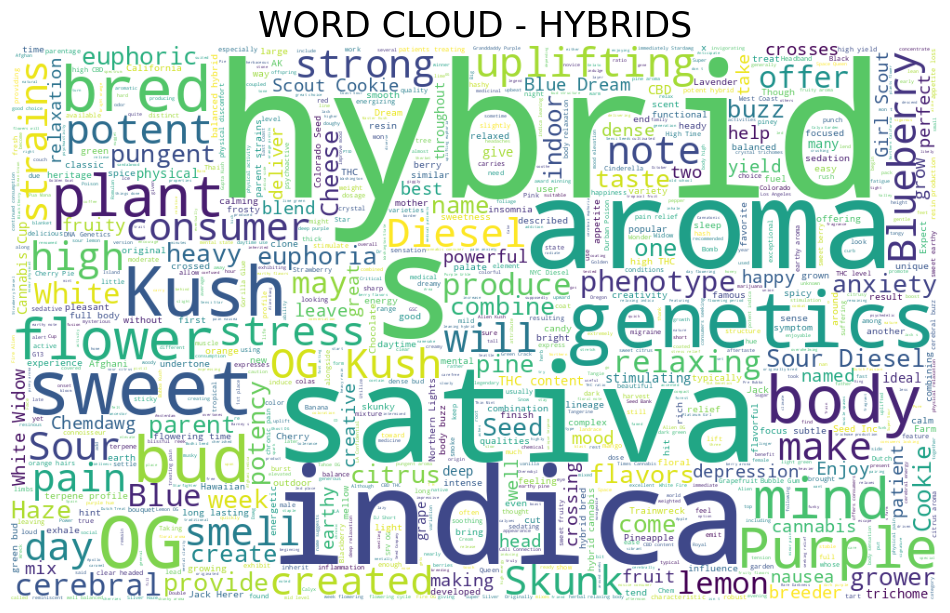

In [31]:
stopwords = set(STOPWORDS)
newStopWords = ['strain', 'effect', 'genetic', 'effects', 'flavor',
                'dominant', 'known','cross']
stopwords.update(newStopWords)

wordcloud = WordCloud(background_color='white',
                      stopwords = stopwords,
                      max_words=1500,
                      max_font_size=200,
                      width=1000, height=600,
                      random_state=42
                      ).generate(
                          " ".join(
                              strains[strains.Type == 'hybrid']
                               ['Description'].astype(str)))

fig = plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - HYBRIDS",
          fontsize=25)
plt.axis('off')
plt.show()

Word Cloud Rating 5 Strains

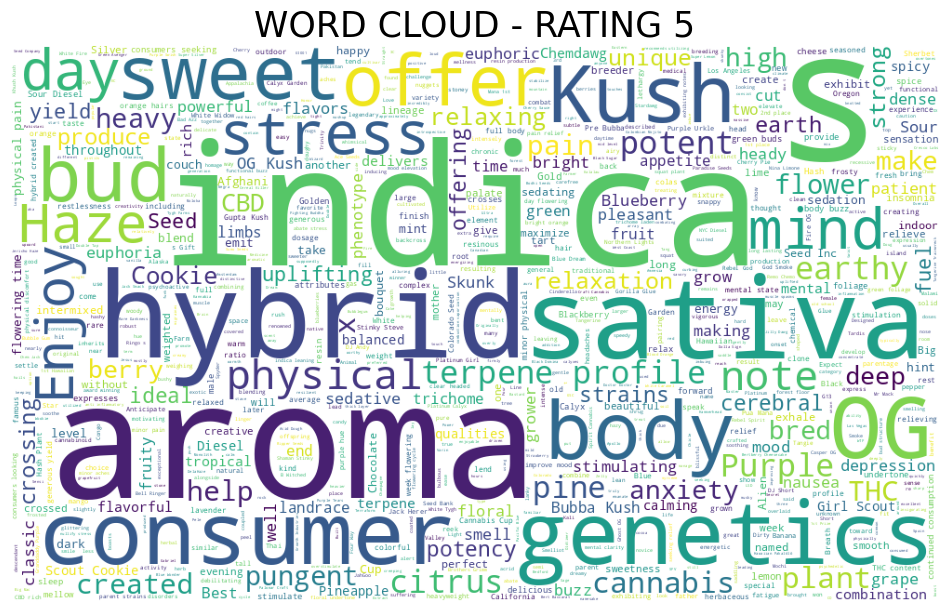

In [32]:
stopwords = set(STOPWORDS)
newStopWords = ['strain', 'effect', 'genetic', 'effects', 'flavor',
                'dominant', 'known','cross']
stopwords.update(newStopWords)

wordcloud = WordCloud(background_color='white',
                      stopwords = stopwords,
                      max_words=1500,
                      max_font_size=200,
                      width=1000, height=600,
                      random_state=42
                      ).generate(
                          " ".join(
                              strains[strains.Rating == 5]
                               ['Description'].astype(str)))

fig = plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - RATING 5",
          fontsize=25)
plt.axis('off')
plt.show()

***Preprocessing Dataset:***

Encoding the target-

In [33]:
# Transforming the Type in numerical
strains['Type'] = pd.factorize(strains['Type'])[0]
del strains['Description']

# this creates 3 numerical types
#0 - Hybrid
#1 - Sativa
#2 - Indica

***Getting Dummy Features***

In [34]:
dummy = pd.get_dummies(strains[['Effect_1','Effect_2','Effect_3',
                                'Effect_4','Effect_5','Flavor_1',
                                'Flavor_2','Flavor_3']])

***Concat dummies into proncipal df***

In [48]:
#Concatenating the result and droping the used variables
strains = pd.concat([strains, dummy], axis=1)

strains = strains.drop(['Strain','Effect_1','Effect_2','Effect_3',
                                'Effect_4','Effect_5','Flavor_1',
                                'Flavor_2','Flavor_3'], axis=1)

strains.shape

(2351, 2852)

***8. Importing Sklearn and Modeling***

In [38]:
#Importing the auxiliar and preprocessing librarys
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score

#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding

In [51]:
strains = strains.replace(".", "")

In [52]:
# setting X and y
X = strains.drop("Type",1)
y = strains["Type"]
feature_name = X.columns.tolist()
X = X.astype(np.float64, copy=False)
y = y.astype(np.float64, copy=False)


<ipython-input-52-fd6d39327e44>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = strains.drop("Type",1)


In [53]:
# Splitting the variab;es in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,
                                                    random_state=42)

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

X_train Shape:  (1645, 2851)
X_test Shape:  (706, 2851)


***Feature Selection***

In [54]:
thresh = 5 * 10**(-3.5)
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

#select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)

X_important_train = selection.transform(X_train)
X_important_test = selection.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [55]:
print('X_important_train_Shape: ', X_important_train.shape)
print('X_important_test_Shape: ', X_important_test.shape)

X_important_train_Shape:  (1645, 96)
X_important_test_Shape:  (706, 96)


***Look at some models and compare scores***
*   explore the models with the best results




LogReg: 0.632219 (+/- 0.037127)
XGBClassifier: 0.556231 (+/- 0.029967)
KNN: 0.587842 (+/- 0.017471)
DecisionTreeClassifier: 0.483891 (+/- 0.028474)
RandomForestClassifier: 0.570213 (+/- 0.030914)
GradientBoostingClassifier: 0.595137 (+/- 0.023020)
RidgeClassifier: 0.623708 (+/- 0.025820)
BaggingRidgeClassifier: 0.541641 (+/- 0.035727)
ExtraTreesClassifier: 0.555015 (+/- 0.027631)


TypeError: ignored

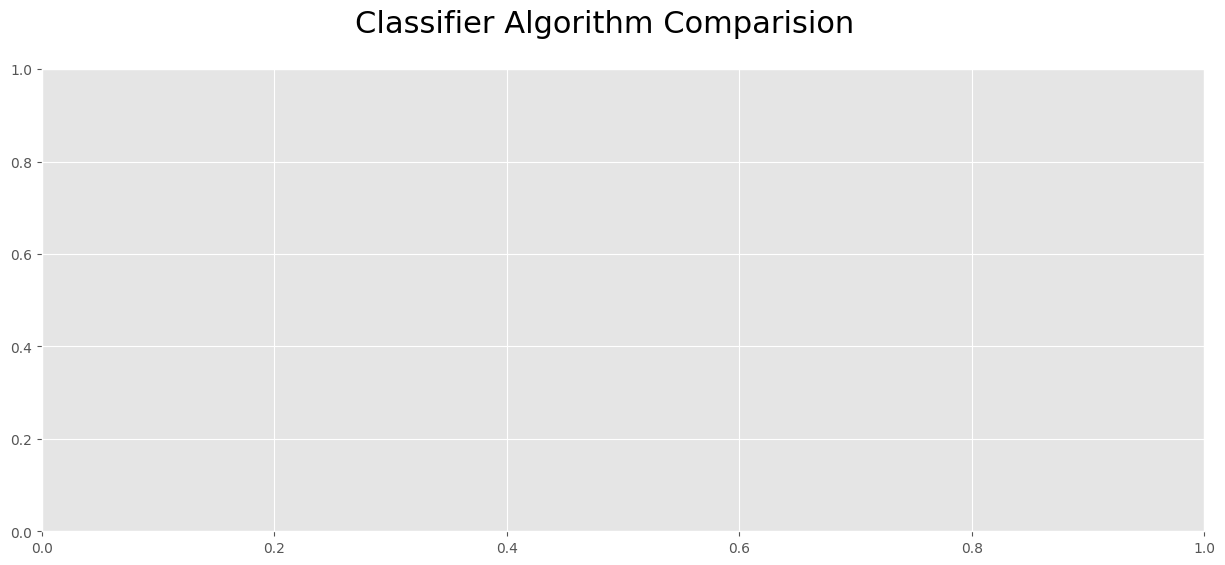

In [69]:
clfs = []
seed = 3

clfs.append(("LogReg",
             Pipeline([
                ("Scalar", StandardScaler()),
                ("LogReg", LogisticRegression())
             ])))

clfs.append(("XGBClassifier",
             Pipeline([
                ("Scalar", StandardScaler()),
                ("XGB", XGBClassifier())
             ])))

clfs.append(("KNN",
             Pipeline([
                ("Scaler", StandardScaler()),
                ("KNN", KNeighborsClassifier())
             ])))

clfs.append(("DecisionTreeClassifier",
             Pipeline([
                ("Scaler", StandardScaler()),
                ("DecisionTrees", DecisionTreeClassifier())
             ])))

clfs.append(("RandomForestClassifier",
             Pipeline([
                ("Scaler", StandardScaler()),
                ("RandomForest", RandomForestClassifier())
             ])))

clfs.append(("GradientBoostingClassifier",
             Pipeline([
                ("Scaler", StandardScaler()),
                ("GradientBoosting", GradientBoostingClassifier())
             ])))

clfs.append(("RidgeClassifier",
             Pipeline([
                ("Scaler", StandardScaler()),
                ("Ridge", RidgeClassifier())
             ])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([
                ("Scaler", StandardScaler()),
                ("BaggingClassifier", BaggingClassifier())
             ])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([
                ("Scaler", StandardScaler()),
                ("ExtraTrees", ExtraTreesClassifier())
             ])))

# 'neg_mean_absolute_error', 'neg_mean_error', 'r2'
scoring = 'accuracy'
n_folds = 7

results, names  = [], []

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_important_train, y_train, cv= 5, scoring=scoring, n_jobs=-1)
    names.append(name)
    results.append(cv_results)
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)

  # boxplot algorithm comparision
fig = plt.figure(figsize=(15, 6))
fig.suptitle('Classifier Algorithm Comparision',
              fontsize=22)
ax = fig.add_subplot(111)

"""
TypeError: Neither the `x` nor `y` variable appears to be numeric.
"""
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel('Algorithm',
              fontsize=20)
ax.set_ylabel('Accuracy of Models',
              fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),
                    rotation=45)
plt.show()

***Select Top 3 Models and set hyperParams to increase predictive power***
* Top 3:
1.   GradientBoostingClassifier
2.   XGBClassifier
3.   RidgeClassifier






***Starting with RidgeClassifier***

In [70]:
from sklearn.model_selection import GridSearchCV

params_ridge = {'alpha':[0.001, 0.1, 1.0],
                'tol':[0.1, 0.01, 0.001],
                'solver':['auto', 'svd', 'cholesky', 'lsqr',
                          'sprase_cg', 'sag', 'saga']}

ridge = RidgeClassifier()

Ridge_model = GridSearchCV(estimator=ridge, param_grid=params_ridge,
                           verbose=1, n_jobs=-1, cv=5)

# Fit the random search model
Ridge_model.fit(X_important_train, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 315.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py", line 1420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

GridSearchCV(cv=5, estimator=RidgeClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.1, 1.0],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sprase_cg', 'sag', 'saga'],
                         'tol': [0.1, 0.01, 0.001]},
             verbose=1)

In [71]:
# Print Training Score
print("Training score data: ")
print(Ridge_model.score(X_important_train, y_train))
print("Ridge Best Parameters: ")
print(Ridge_model.best_params_)

Training score data: 
0.6498480243161094
Ridge Best Parameters: 
{'alpha': 0.001, 'solver': 'auto', 'tol': 0.1}


***Using this model we will make our predictions***

In [72]:
# Predicting with X_test
Ridge_model = RidgeClassifier(solver='sparse_cg', tol=0.001, alpha=1.0)
Ridge_model.fit(X_important_train, y_train)
y_pred = Ridge_model.predict(X_important_test)

# Print results
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6359773371104815
[[291  23  59]
 [ 87  37   5]
 [ 79   4 121]]
              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70       373
         1.0       0.58      0.29      0.38       129
         2.0       0.65      0.59      0.62       204

    accuracy                           0.64       706
   macro avg       0.62      0.55      0.57       706
weighted avg       0.63      0.64      0.62       706



**Legend:**
- 0 hybrid
- 1 sativa
- 2 indica

The precision of *Hybrid* and *Indica* are about the same and they're higher than *Sativa*.

In Recall the *Hybrid* have the highest values.

***Evaluate the best params to XGBoost model***

In [73]:
param_xgb = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight':[2, 3, 4, 5],
    'colsample_bytree':[.1, 0.2, 0.3,0.6,0.7,0.8],
    'colsample_bylevel':[0.2, 0.6, 0.8]
}

In [74]:
xgb = XGBClassifier()

xgb_model = GridSearchCV(estimator=xgb,
                         param_grid=param_xgb,
                         scoring='accuracy',
                         cv=3,
                         verbose=1)

xgb_model.fit(X_important_train, y_train)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bylevel': [0.2, 0.6, 0.8],
                         'colsample_bytree': [0.1, 0.2, 0.3, 0.6, 0.7, 0.8],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_weight': [2, 3, 4, 5],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=1)

In [76]:
print('Result of GridSearchCV of XGB: ')
print(xgb_model.best_params_)
print(xgb_model.score(X_important_train, y_train))

Result of GridSearchCV of XGB: 
{'colsample_bylevel': 0.2, 'colsample_bytree': 0.2, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 100}
0.676595744680851


In [77]:
# Set the best params to our model and fit again
xgb = XGBClassifier(colsample_bylevel=0.1, colsample_bytree=.8,
                    objective='multi', max_depth=4, min_child_weight=2,
                    n_estimators=150)

xgb.fit(X_important_train, y_train)

# Predicting with X_test
y_pred = xgb.predict(X_important_test)

# Results
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Legend of Prediction Results: ")
print("- 0 Hybrid")
print("- 1 Sativa")
print("- 2 Indica")

[[265  45  63]
 [ 83  41   5]
 [ 77   9 118]]
              precision    recall  f1-score   support

         0.0       0.62      0.71      0.66       373
         1.0       0.43      0.32      0.37       129
         2.0       0.63      0.58      0.61       204

    accuracy                           0.60       706
   macro avg       0.56      0.54      0.55       706
weighted avg       0.59      0.60      0.59       706

Legend of Prediction Results: 
- 0 Hybrid
- 1 Sativa
- 2 Indica


These results turned out better than our Ridge model. The recall of Hybrids increase while Sativas decrease in XGBoost model

***Fit and Predict with GradientBoostingClassifier model***

In [80]:
param_gb = {
    'n_estimators':[50, 125, 150],
    'max_depth':[2, 3, 4],
    'max_features':[3, 4, 5, 6],
    'learning_rate':[0.0001, 0.001, 0.01,0.1,1]
}

gb = GradientBoostingClassifier()
gb_model = GridSearchCV(estimator=gb,
                        param_grid=param_gb,
                        scoring='accuracy',
                        cv=5,
                        verbose=1)

gb_model.fit(X_important_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
                         'max_depth': [2, 3, 4], 'max_features': [3, 4, 5, 6],
                         'n_estimators': [50, 125, 150]},
             scoring='accuracy', verbose=1)

In [81]:
print('Result of GridSearchCV of Gradient Boosting Classifier: ')
print(gb_model.best_params_)
print(gb_model.score(X_important_train, y_train))

Result of GridSearchCV of Gradient Boosting Classifier: 
{'learning_rate': 0.1, 'max_depth': 2, 'max_features': 3, 'n_estimators': 150}
0.6668693009118541


Fit the model with params and then make predictions

In [82]:
gb = GradientBoostingClassifier(learning_rate=.1, max_depth=3,
                                max_features=3, n_estimators=150)
gb.fit(X_important_train, y_train)

# Predicting with X_test
y_pred = gb.predict(X_important_test)

# Print Results
print("METRICS \nAccuracy Score: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

METRICS 
Accuracy Score:  0.6118980169971672
[[287  34  52]
 [ 94  31   4]
 [ 86   4 114]]
              precision    recall  f1-score   support

         0.0       0.61      0.77      0.68       373
         1.0       0.45      0.24      0.31       129
         2.0       0.67      0.56      0.61       204

    accuracy                           0.61       706
   macro avg       0.58      0.52      0.54       706
weighted avg       0.60      0.61      0.59       706



Although we got the highest score in gradientBoosting with training dataset, we have better results in the XGBoostingClassifier model with ""% of prediction

***TPOT***

[Tree-Based Pipeline Optimization Tool](http://epistasislab.github.io/tpot/) (TPOT): using [genetic programming](https://geneticprogramming.com/) to find the best performing ML pipeelines, built ontop of scikit-learn

In [85]:
# Import
from tpot import TPOTClassifier

Once we have a cleaned dataset, TPOT will help with the following steps of your ML pipeline:

*   Feature preprocessing
*   Feature construction and selection
*   Model Selection
*   Hyperparameter optimization

TPOT will provide you with the best performing pipeline after its done with experimentaion.

Similar to scikit-learn's API, TPOT is very user-friendly and easy to implement into a model.



In [86]:
from pandas.core.dtypes.cast import maybe_box_datetimelike
# Creating the model and setting parameters
tpot = TPOTClassifier(verbosity=2, max_time_mins=2,
                      scoring='accuracy',
                      max_eval_time_mins=2, memory='auto',
                      generations=5, population_size=15,
                      random_state=3, early_stop=3)

***Fitting out automated model and getting output result***

In [87]:
# Fitting the Auto TPOTClassifier
tpot.fit(X_important_train, y_train)

# Evaluating the results
print("Accuracy is {}%".format(tpot.score(X_important_test, y_test) * 100))

Optimization Progress:   0%|          | 0/15 [00:00<?, ?pipeline/s]


2.00 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.55, min_samples_leaf=12, min_samples_split=4, n_estimators=100)
Accuracy is 62.18130311614731%
